In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#import cartopy
#import cartopy.crs as ccrs
#import cartopy.feature as cf
#import cartopy.io.shapereader as shapereader
import pandas as pd

from pathlib import Path

In [3]:
Sefwi_Bekwai=pd.read_fwf('GAUGE_PRECIP-20221019T102326Z-001/GAUGE_PRECIP/Sefwi_Bekwai_1983_2017_dRR_gapless.txt', header=None)

In [4]:
Sefwi_Bekwai.columns=['Year','Month','Day','Rain']
Sefwi_Bekwai['Date']=pd.to_datetime(Sefwi_Bekwai[['Year','Month','Day']])

In [5]:
SB=Sefwi_Bekwai.drop(['Year','Month','Day'], axis=1)
Sfb=SB.set_index('Date')

In [6]:
SEF=Sfb.resample('y').sum()

In [7]:
SEFmean=np.mean(SEF)
SEF_ano=SEF['Rain']-SEFmean

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
SEmean=SEF['Rain'].mean()
SE_ano=SEF['Rain']-SEmean

In [10]:
sk=pd.DataFrame(SE_ano)

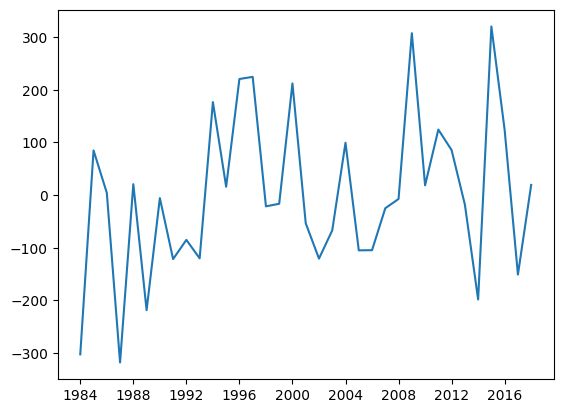

In [11]:
plt.plot(sk)

<BarContainer object of 35 artists>

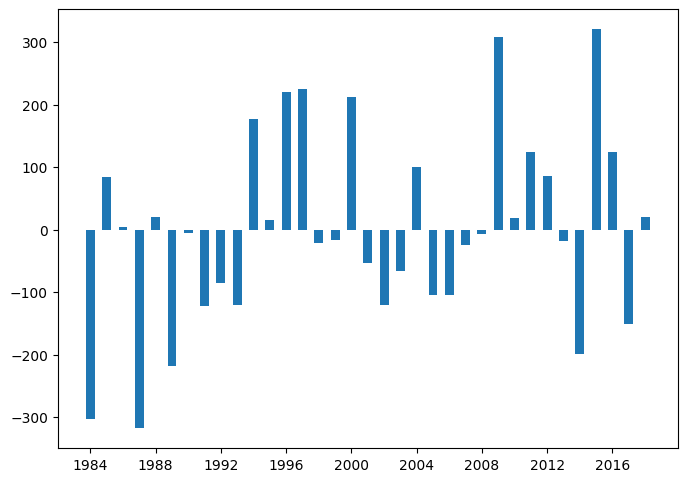

In [14]:
fig=plt.figure(figsize=(8,5.7))
plt.bar(sk.index,sk.Rain, width=200)

In [15]:
def Anom (data):
    mean=np.mean(data)
    anomaly=data-mean
    return anomaly

In [19]:
ANOM=Anom(SEF)

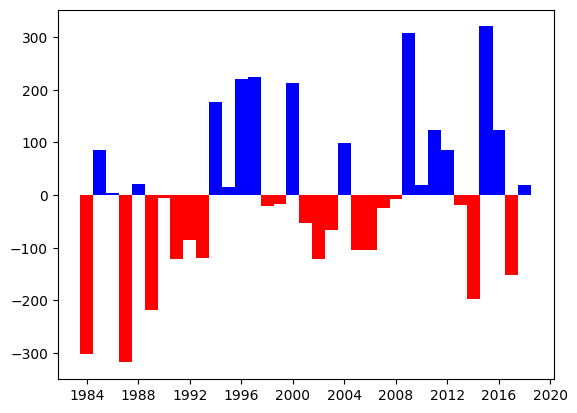

In [24]:
ANOM["color"] = np.where(ANOM["Rain"]<0, 'red', 'blue')

fig = plt.bar(ANOM.index,ANOM.Rain, color=ANOM.color, width=370)